<a href="https://colab.research.google.com/github/Fazril1/Machine-Learning/blob/main/Tugas-Tugas/Tugas%20Minggu%205/EDA%20dan%20PCA%20Dengan%20Dataset%20Lainnya/EDA%20dan%20PCA%20Dengan%20Dataset%20Lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ibnu Fazril 1103201241 Tugas Ke-5 EDA dan PCA Dengan Dataset Lainnya

In [96]:
from google.colab import drive # Panggil modul drive dari daftar pustaka google collab untuk mengakses google drive
drive.mount('/content/drive') # Lokasi Direktori yang akan diakses
import pandas as pd # Panggil modul pandas untuk membaca dataframe dan menganalisis data
import matplotlib.pyplot as plt # Panggil modul matplotlib.pyplot untuk memvisualisasikan sebaran data ke dalam grafik
import numpy as np # Panggil modul numpy untuk penjumlahan aritmatika
import seaborn as sns # Panggil modul seaborn untuk melihat hubungan antara variabel dalam data
from sklearn.model_selection import train_test_split # Panggil modul train_test_split dari daftar pustaka sklearn.model_sselection untuk membagi data menjadi 2 yaitu data pengujian dan data pelatihan
from sklearn.preprocessing import LabelEncoder # Panggil modul label encoder dari daftar pustaka sklearn.preprocessing untuk menggunakan fitur polynomial dan preprocessing data ke bentuk yang bisa diolah oleh python
from sklearn.decomposition import PCA # Panggil modul PCA dari daftar pustaka sklearn.decomposition untuk mereduksi data menjadi lebih kecil
from sklearn.svm import SVR # Panggil modul SVR untuk menggunakan metode SVM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
file_path = '/content/drive/MyDrive/Dataset/laptop_price.csv' # Lokasi file dataset di Google Drive

df = pd.read_csv(file_path, encoding='ISO-8859-1') # Membaca dataset CSV ke dalam DataFrame dan merubah format data dengan encoding agar data bisa diuraikan

print(df.head()) # Menampilkan beberapa baris pertama dataset

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [98]:
df.head(17) # Menampilkan 17 baris pertama dataset

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [99]:
df # Menampilkan 5 baris pertama dan 5 baris terakhir dalam dataset

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [100]:
df.info() # Untuk menampilkan informasi ringkas dalam DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [101]:
df.describe() # Untuk menampilkan jumlah baris data, rata-rata nilai setiap kolom, standar deviasi, min yaitu nilai terkecil setiap kolom, Q1, Q2, Q3, serta yang terakhir adalah max yaitu nilai terbesar setiap kolom

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# EDA

<ipython-input-102-8832ef431c20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2) # Evaluasai skor korelasi dengan fungsi corr()


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

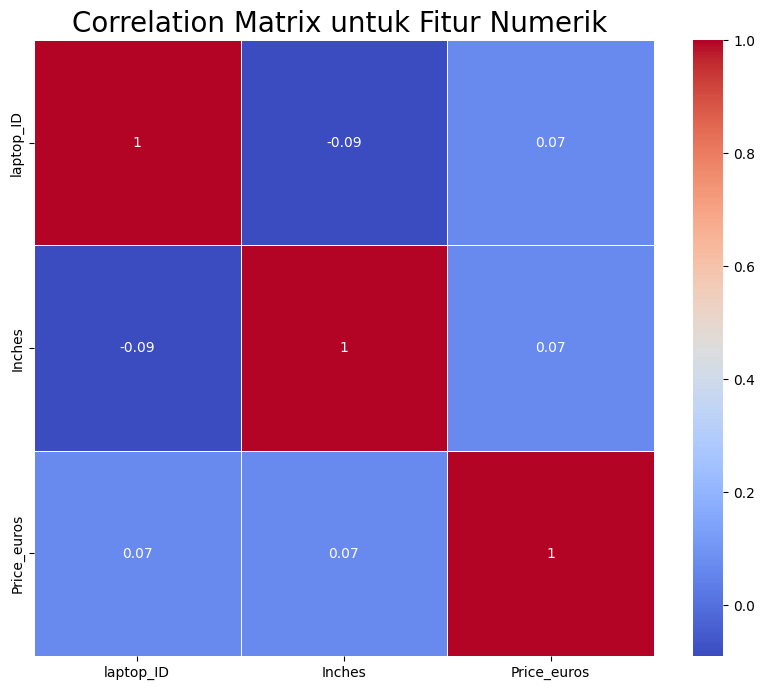

In [102]:
plt.figure(figsize=(10, 8)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 8 inci
correlation_matrix = df.corr().round(2) # Evaluasai skor korelasi dengan fungsi corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ) # Heatmap yang dikategorikan berdasarkan fitur dari dataset dengan warna heatmap yaitu coolwarm
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20) # Menulis judul Correlation Matrix untuk Fitur Numerik dengan ukuran teks 20

berdasarkan gambar dari heatmap bisa dilihat bahwa kolom 'laptop_ID', dan 'Inches' itu tidak terlalu berpengaruh terhadap hasil akurasi dikarenakan hubungan kolom-kolom tersebut dengan kolom lainnya yang ada di dalam dataset terlalu kecil dengan warna biru sebagai penandanya, lalu kenapa price_euros itu tidak dihilangkan? karena itu adalah variabel target yang ingin diprediksi akurasinya.

In [103]:
df.drop(['laptop_ID'], inplace=True, axis=1) # Hapus kolom laptop_ID
df.drop(['Inches'], inplace=True, axis=1) # Hapus kolom Inches
df.head() # Tampilkan 5 baris pertama setelah menghilangkan beberapa kolom

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Memprediksi Kolom Target yaitu "Price_euros" Menggunakan Metode Support Vector Machine Tanpa PCA

In [104]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder() # Panggil fungsi LabelEncoder() dan simpan dalam variabel label_encoder untuk mengubah parameter dalam dataset menjadi bentuk float/int

# Preprocessing data
df['Company'] = label_encoder.fit_transform(df['Company']) # mengubah paramter string menjadi float
df['Product'] = label_encoder.fit_transform(df['Product']) # mengubah paramter string menjadi float
df['TypeName'] = label_encoder.fit_transform(df['TypeName']) # mengubah paramter string menjadi float
df['ScreenResolution'] = label_encoder.fit_transform(df['ScreenResolution']) # mengubah paramter string menjadi float
df['Cpu'] = label_encoder.fit_transform(df['Cpu']) # mengubah paramter string menjadi float
df['Ram'] = label_encoder.fit_transform(df['Ram']) # mengubah paramter string menjadi float
df['Memory'] = label_encoder.fit_transform(df['Memory']) # mengubah paramter string menjadi float
df['Gpu'] = label_encoder.fit_transform(df['Gpu']) # mengubah paramter string menjadi float
df['OpSys'] = label_encoder.fit_transform(df['OpSys']) # mengubah paramter string menjadi float
df['Weight'] = label_encoder.fit_transform(df['Weight']) # mengubah paramter string menjadi float

In [105]:
X = df.drop(["Price_euros"], axis=1) # Hapus kolom price di variabel fitur
y = df['Price_euros'].values # Kolom target yang akan diprediksi (variabel independen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Bagi data menjadi data latih dan data uji

In [106]:
svm_regressor = SVR(kernel='linear')  # Menggunakan Metode SVM
model_tanpa_dimensionality_reduction = svm_regressor.fit(X_train, y_train) # Memprediksi akurasi dari price
model_tanpa_dimensionality_reduction.score(X_test, y_test) # Tampilkan hasil akurasi

0.34579695361014406

# Memprediksi Kolom Target yaitu "Price_euros" Menggunakan Metode Support Vector Machine Dengan PCA

In [107]:
pca = PCA (n_components=4) # Membuat 4 principal component

pca_attributes = pca.fit_transform(X_train) # Mereduksi data X_train

pca.explained_variance_ratio_ # Tampilkan array

array([0.91141489, 0.05449215, 0.02177493, 0.00803191])

In [108]:
pca = PCA (n_components=2) # Membuat 2 principal component
X_train_pca = pca.fit_transform(X_train) # Mereduksi data X_train
X_test_pca = pca.fit_transform(X_test) # Mereduksi data X_test

In [109]:
# Uji akurasi 2 principal component
model_dengan_PCA_2_components = svm_regressor.fit(X_train_pca, y_train) # Memprediksi akurasi price
model_dengan_PCA_2_components.score(X_test_pca, y_test) # Tampilkan hasil akurasi

-0.20517237851031744